# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='left')

# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
#How many mice are included in the study?
unique_mice_count = mouse_study_df['Mouse ID'].nunique()
print(unique_mice_count)

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#duplicate_rows = mouse_study_df[mouse_study_df.duplicated(subset=['Mouse ID','Timepoint'], keep='first')]
#duplicate_rows.head()

# Drop duplicates
cleaned_df = mouse_study_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
                                
# Display the cleaned DataFrame
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice in the clean DataFrame.
#cleaned_df = cleaned_df['Mouse ID'].nunique()
#print(cleaned_df)

# Summary Statistics

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mc_df = cleaned_df.describe()
mc_df.head()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,12.792903,25.661547,19.597458,50.449276,1.023835
std,7.186737,3.926776,14.084762,8.904565,1.138507
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000


In [11]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

#drug_column = cleaned_df['Drug Regimen']
#drug_regimen_list = set(drug_column)
#drug_regimen_list

{'Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol'}

In [6]:
# Group by 'Drug Regimen' and calculate statistics of 'Tumor Volume (mm3)'
tumor_df = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'std', 'var', 'sem'])

#rename columns, AI suggested using inplace=True for efficiency.
tumor_df.rename(columns={'mean': 'Mean Tumor Volume',
                   'median': 'Median Tumor Volume',
                   'var': 'Tumor Volume Variance',
                   'std': 'Tumor Volume Std. Dev.',
                   'sem': 'Tumor Volume Std. Err.'
                   }, inplace=True)

# Display the new dataframe
tumor_df.head()

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Std. Dev.,Tumor Volume Variance,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466


# Bar and Pie Charts

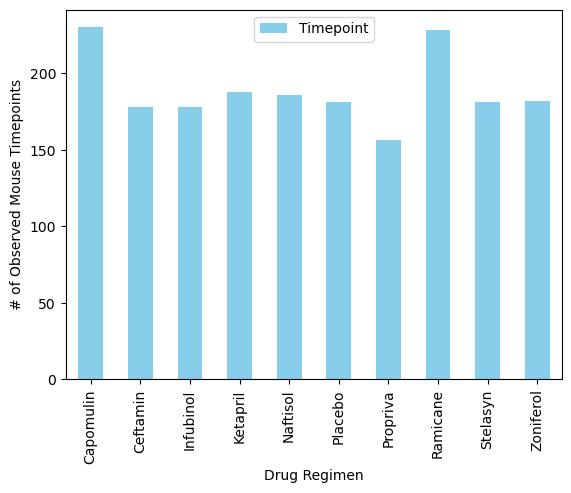

In [7]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
grouped_df = cleaned_df.groupby('Drug Regimen')['Timepoint'].count().reset_index()

#set the columns
x_column = 'Drug Regimen'
y_column = 'Timepoint'

# Create the bar plot using Pandas
grouped_df.plot(x=x_column, y=y_column, kind='bar', color='skyblue')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

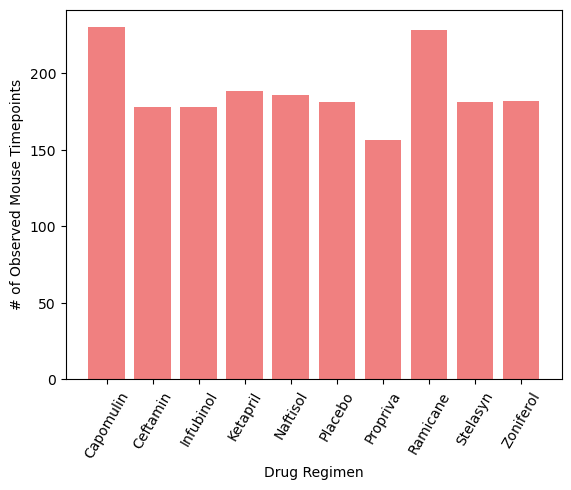

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Matplotlib.
# Set the columns 
x_column = 'Drug Regimen'
y_column = 'Timepoint'

# Create the bar plot using Matplotlib's pyplot
plt.bar(grouped_df[x_column], grouped_df[y_column], color='lightcoral')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=60)
plt.show() 

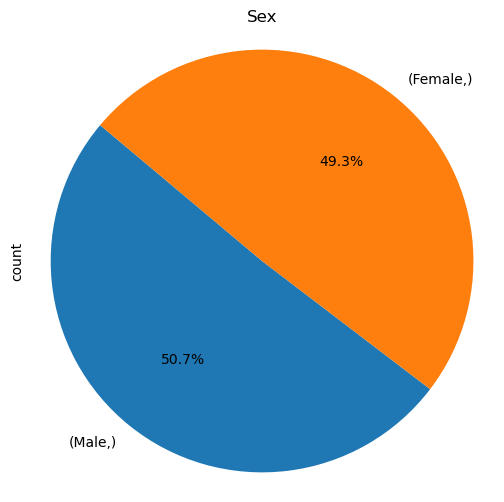

In [23]:
#CHECK FORMATTING BEFORE HANDING IN IF YOU FEEL LIKE IT
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_data = cleaned_df[['Sex']].value_counts()

# Create a pie chart using Pandas with the selected columns
sex_data.plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(6, 6))

# Display the pie chart
plt.title("Sex")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

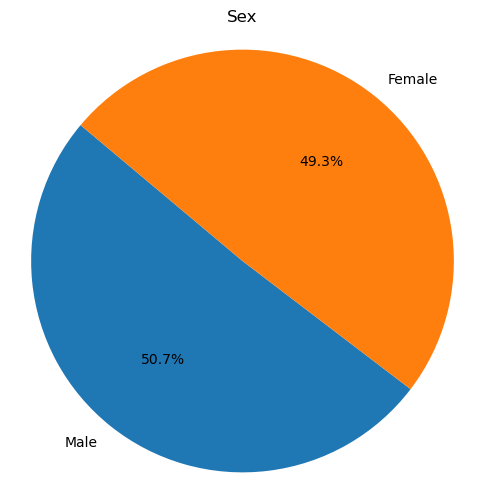

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Create a pie chart
# Extract data from the DataFrame column
sexes = cleaned_df['Sex'].value_counts().tolist()  # Assuming 'sizes_column' is the column containing sizes
labels = ['Male', 'Female']

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.title("Sex")
plt.pie(sexes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Display the pie chart
plt.show()



## Quartiles, Outliers and Boxplots